# Zadanie 1

In [ ]:
import pandas as pd
file = 'https://marcingabryel.pl/ai/iris.csv'
dataframe = pd.read_csv(file)

print(dataframe)

In [38]:
#dataframe['y'] = dataframe['variety'].map({'Setosa': 1.0, 'Versicolor': 0.0, 'Virginica': 0.0})
#dataframe['y'] = dataframe['variety'].map({'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 0.0})
dataframe['y'] = dataframe['variety'].map({'Setosa': 0.0, 'Versicolor': 0.0, 'Virginica': 1.0})
print(dataframe)

     sepal.length  sepal.width  petal.length  petal.width    variety   y1  \
0             5.1          3.5           1.4          0.2     Setosa  1.0   
1             4.9          3.0           1.4          0.2     Setosa  1.0   
2             4.7          3.2           1.3          0.2     Setosa  1.0   
3             4.6          3.1           1.5          0.2     Setosa  1.0   
4             5.0          3.6           1.4          0.2     Setosa  1.0   
..            ...          ...           ...          ...        ...  ...   
145           6.7          3.0           5.2          2.3  Virginica  0.0   
146           6.3          2.5           5.0          1.9  Virginica  0.0   
147           6.5          3.0           5.2          2.0  Virginica  0.0   
148           6.2          3.4           5.4          2.3  Virginica  0.0   
149           5.9          3.0           5.1          1.8  Virginica  0.0   

      y2   y3    y  
0    0.0  0.0  0.0  
1    0.0  0.0  0.0  
2    0.0  0.

In [39]:
x = dataframe[ ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = dataframe['y']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy' )

In [42]:
E=80
history = model.fit(x_train, y_train, epochs=E, batch_size=1,verbose=1)


Epoch 1/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8859
Epoch 2/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7268
Epoch 3/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6696
Epoch 4/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6342 
Epoch 5/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6403
Epoch 6/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6160
Epoch 7/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.5843
Epoch 8/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6151
Epoch 9/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5755
Epoch 10/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5946
Epoch 11/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5839
Epoch 12/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5984
Epoch 13/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5892
Epoch 14/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6156
Epoch 15/80
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

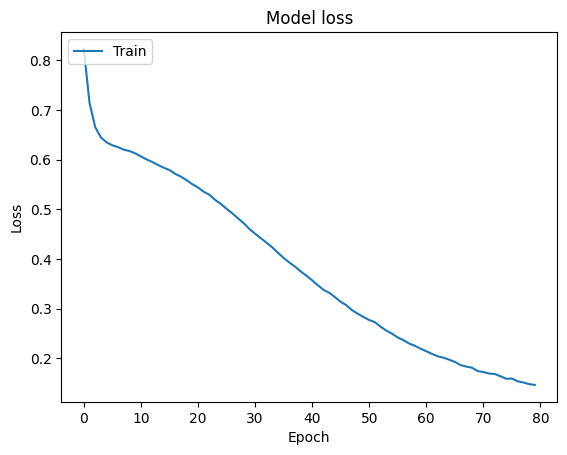

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [44]:
import numpy as np
#wyniki uzyskane z sieci dla danych treningowych
y_result_test = model.predict(x_test)
#porównanie wyników otrzymanych podczas klasyfikacji oraz wartości oczekiwanych
print( np.column_stack( (np.round(y_result_test), y_test) ))
bledy = 0
for i in range(len(y_test)):
  if np.round(y_result_test[i]) != y_test[i]:
    bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
[[0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]]
Liczba bledow ciagu treningowego:  0


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Przewidywanie wyników
y_pred = model.predict(x_train)
# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]
# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded)
recall = recall_score(y_train, y_pred_rounded)
# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_train, y_pred_rounded)
# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.975
Precision: 0.9302325581395349
Recall: 0.9302325581395349
Confusion Matrix:
 [[77  3]
 [ 0 40]]


#Zadanie 3 - uczenie dla 3 rodziajów

In [57]:
import pandas as pd
file = 'https://marcingabryel.pl/ai/iris.csv'
dataframe = pd.read_csv(file)

print(dataframe)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [58]:
dataframe['y1'] = dataframe['variety'].map({'Setosa': 1.0, 'Versicolor': 0.0, 'Virginica': 0.0})
dataframe['y2'] = dataframe['variety'].map({'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 0.0})
dataframe['y3'] = dataframe['variety'].map({'Setosa': 0.0, 'Versicolor': 0.0, 'Virginica': 1.0})
print(dataframe)

     sepal.length  sepal.width  petal.length  petal.width    variety   y1  \
0             5.1          3.5           1.4          0.2     Setosa  1.0   
1             4.9          3.0           1.4          0.2     Setosa  1.0   
2             4.7          3.2           1.3          0.2     Setosa  1.0   
3             4.6          3.1           1.5          0.2     Setosa  1.0   
4             5.0          3.6           1.4          0.2     Setosa  1.0   
..            ...          ...           ...          ...        ...  ...   
145           6.7          3.0           5.2          2.3  Virginica  0.0   
146           6.3          2.5           5.0          1.9  Virginica  0.0   
147           6.5          3.0           5.2          2.0  Virginica  0.0   
148           6.2          3.4           5.4          2.3  Virginica  0.0   
149           5.9          3.0           5.1          1.8  Virginica  0.0   

      y2   y3  
0    0.0  0.0  
1    0.0  0.0  
2    0.0  0.0  
3    0.0  0

In [62]:
x = dataframe[ ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = dataframe[['y1', 'y2', 'y3']]
y

,y1,y2,y3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Model sieci neuronowej

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy' )

In [51]:
E=60
history = model.fit(x_train, y_train, epochs=E, batch_size=1,verbose=1)

Epoch 1/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.6523
Epoch 2/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6386
Epoch 3/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6248
Epoch 4/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6137
Epoch 5/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5954
Epoch 6/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5624
Epoch 7/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5474 
Epoch 8/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5195
Epoch 9/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5001
Epoch 10/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4649
Epoch 11/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4619
Epoch 12/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4255
Epoch 13/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4087
Epoch 14/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3781 
Epoch 15/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

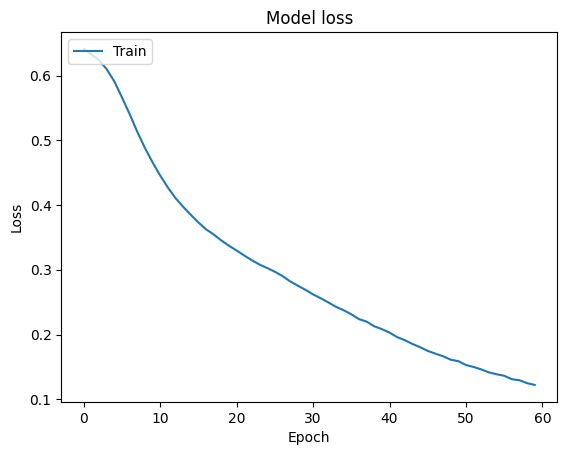

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [63]:
import numpy as np
#wyniki uzyskane z sieci dla danych treningowych
y_result_test = model.predict(x_test)
#porównanie wyników otrzymanych podczas klasyfikacji oraz wartości oczekiwanych
print( np.column_stack( (np.argmax(y_result_test,  axis=1), np.argmax(y_test,  axis=1)) ) )
bledy = 0
for i in range(len(y_test)):
  if np.argmax(y_result_test,  axis=1)[i] != np.argmax(y_test,  axis=1)[i]:
    bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
[[2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]]
Liczba bledow ciagu treningowego:  0


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred = model.predict(x_train)
y_pred_rounded = np.argmax((y_pred), axis=1)

print(y_pred_rounded)

y_train_rounded = np.argmax((y_train), axis=1)
print(y_train_rounded)


accuracy = accuracy_score(y_train_rounded, y_pred_rounded)
precision = precision_score(y_train_rounded, y_pred_rounded, average='micro')
recall = recall_score(y_train_rounded, y_pred_rounded, average='macro')
conf_matrix = confusion_matrix(y_train_rounded, y_pred_rounded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[1 2 0 1 2 0 1 0 0 0 1 0 2 0 0 1 1 0 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 2 0 2
 0 1 0 0 0 2 0 2 0 1 0 2 1 0 0 2 0 1 0 0 1 2 0 0 0 0 0 0 1 2 2 0 1 2 1 1 1
 1 0 2 1 0 1 2 0 2 2 2 0 1 1 0 0 2 1 2 2 0 1 0 1 1 1 2 2 2 2 0 1 1 1 2 1 1
 1 0 2 1 1 2 2 2 0]
[1 1 0 1 2 0 1 0 0 0 1 0 2 0 0 1 1 0 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 2 0 2
 0 1 0 0 0 2 0 2 0 1 0 2 1 0 0 2 0 1 0 0 1 2 0 0 0 0 0 0 1 2 2 0 1 2 1 1 1
 1 0 2 1 0 1 2 0 2 2 2 0 1 1 0 0 2 2 2 2 0 1 0 1 1 1 2 2 2 2 0 1 1 1 2 1 1
 1 0 2 1 1 2 2 2 0]
Accuracy: 0.9833333333333333
Precision: 0.9833333333333333
Recall: 0.9833333333333333
Confusion Matrix:
 [[40  0  0]
 [ 0 39  1]
 [ 0  1 39]]


# Zadanie 4

In [64]:
import pandas as pd
file = 'https://marcingabryel.pl/ai/pid.csv'
dataframe = pd.read_csv(file)

print(dataframe)

     pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     diabetes_pedigree_function  age  class  
0                         0.627   50     

In [65]:
x = dataframe[ ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age']]
y = dataframe['class']


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [104]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input

model = Sequential()
model.add(Input(shape=(8,)))

model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy' )

In [106]:
E=20
history = model.fit(x_train, y_train, epochs=E, batch_size=1,verbose=1)

Epoch 1/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6150
Epoch 2/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6138
Epoch 3/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6153
Epoch 4/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.6109
Epoch 5/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6029
Epoch 6/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6196
Epoch 7/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5932
Epoch 8/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5799
Epoch 9/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6199
Epoch 10/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6498
Epoch 11/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6218
Epoch 12/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6162
Epoch 13/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6282
Epoch 14/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6079
Epoch 15/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - lo

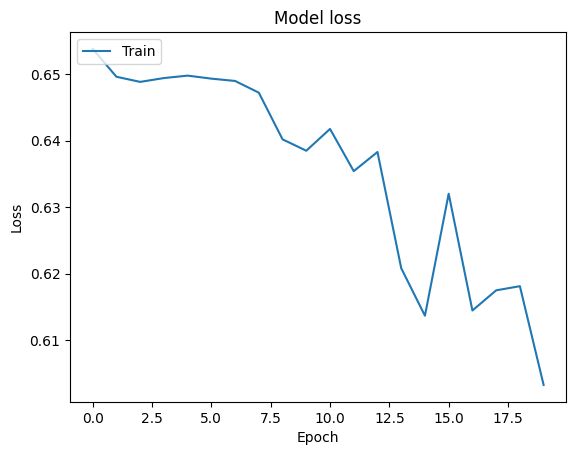

In [103]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [97]:
import numpy as np
#wyniki uzyskane z sieci dla danych treningowych
y_result_test = model.predict(x_test)
#porównanie wyników otrzymanych podczas klasyfikacji oraz wartości oczekiwanych
print( np.column_stack( (np.round(y_result_test), y_test) ))
bledy = 0
for i in range(len(y_test)):
  if np.round(y_result_test[i]) != y_test[i]:
    bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Przewidywanie wyników
y_pred = model.predict(x_train)
# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]
# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded)
recall = recall_score(y_train, y_pred_rounded)
# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_train, y_pred_rounded)
# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.6596091205211726
Precision: 0.5531914893617021
Recall: 0.5531914893617021
Confusion Matrix:
 [[379  21]
 [188  26]]
